## Лабороторная работа 3
### РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ПРЯМЫМИ МЕТОДАМИ. ТЕОРИЯ ВОЗМУЩЕНИЙ
#### Хайкова Светлана, вариант 25

3.1.25, 3.3.7, 3.10.5

## Задача 3.1. Дана система уравнений Ax=b порядка n. Исследовать зависимость погрешности решения x от погрешностей правой части системы b.

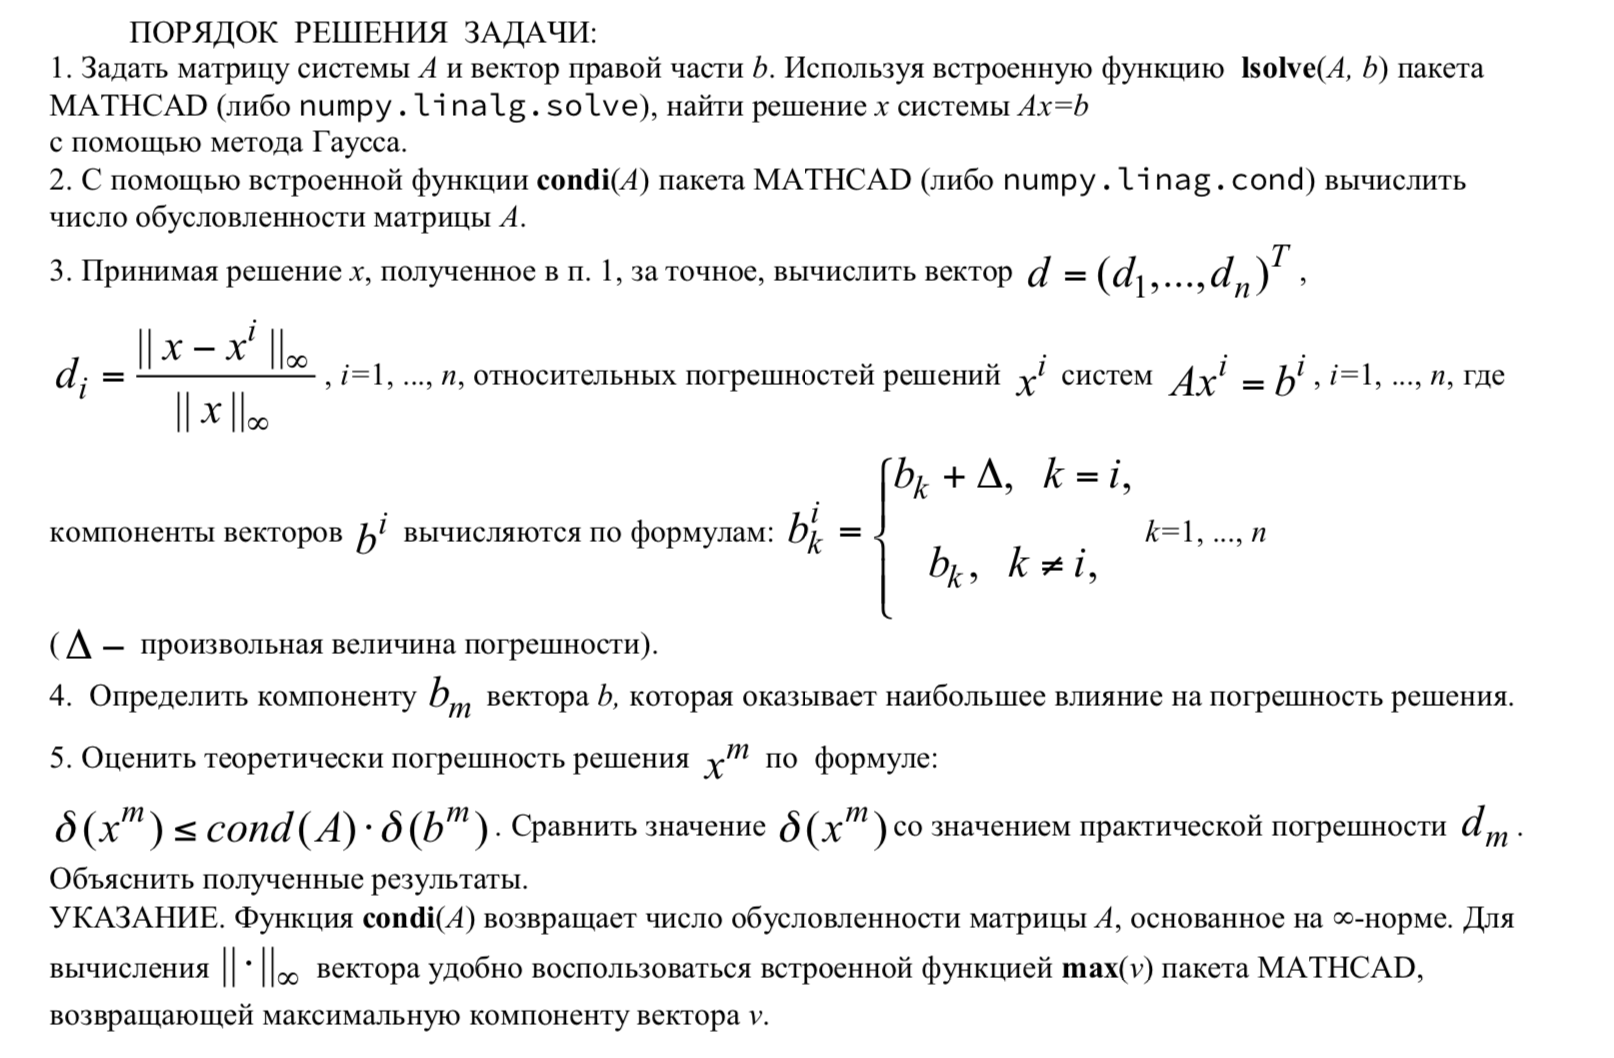

In [460]:
from IPython.display import Image
Image("task1.png")

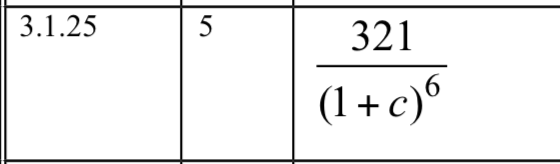

In [461]:
Image("task1var.png")

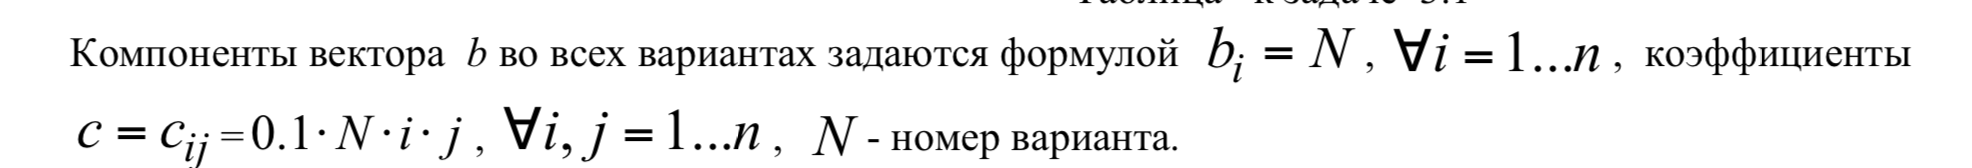

In [462]:
Image("task1b.png")

In [463]:
import numpy as np
import numpy.linalg as npl

In [464]:
# зададим матрицу и вектор b
N = 25
n = 5
b = N * np.ones(n)
A = np.array([[321 / (1 + 0.1 * N * i * j)**6 for j in range(1, n + 1)] for i in range(1, n + 1)])
print 'матрица A: \n', A
print 'вектор b: \n', b

матрица A: 
[[1.74621119e-01 6.88014403e-03 8.51121337e-04 1.81196132e-04
  5.30276549e-05]
 [6.88014403e-03 1.81196132e-04 1.91330910e-05 3.74273660e-06
  1.03911818e-06]
 [8.51121337e-04 1.91330910e-05 1.90589012e-06 3.61688641e-07
  9.85690692e-08]
 [1.81196132e-04 3.74273660e-06 3.61688641e-07 6.75774643e-08
  1.82424841e-08]
 [5.30276549e-05 1.03911818e-06 9.85690692e-08 1.82424841e-08
  4.89623981e-09]]
вектор b: 
[25. 25. 25. 25. 25.]


In [465]:
# нашли решение системы
x = npl.solve(A, b)
print 'Решение Ax = b: \n', x

Решение Ax = b: 
[ 6.89963722e+08 -6.44327418e+11  2.78844422e+13 -2.13237970e+14
  3.62404010e+14]


In [466]:
condA = npl.cond(A)
print 'Число обусловленности матрицы A:\n', condA

Число обусловленности матрицы A:
7026428054933.254


In [467]:
# найдем вектор d:
delta = 1e-3

d = []
B = []
for i in range(0, n):
    # тут задаем b_k
    b_k = np.array(b)
    b_k[i] += delta
    print 'Вектор b_m[i]: ', b_i, ' Вектор b: ', b, '\n'
    B.append(b_k)
    
    # тут решаем систему с новым b_k и находим компоненту вектора d
    x_i = npl.solve(A, b_k)
    d.append(npl.norm(x - x_i, np.inf) / npl.norm(x, np.inf))
    
ind_m = np.argmax(d)
print 'Вектор относительных погрешностей решений x_i систем Ax_i = b_i\n', d, '\n'
print 'Индекс максимальной компоненты вектора d:\n', ind_m

Вектор b_m[i]:  [25.    25.    25.    25.    25.001]  Вектор b:  [25. 25. 25. 25. 25.] 

Вектор b_m[i]:  [25.    25.    25.    25.    25.001]  Вектор b:  [25. 25. 25. 25. 25.] 

Вектор b_m[i]:  [25.    25.    25.    25.    25.001]  Вектор b:  [25. 25. 25. 25. 25.] 

Вектор b_m[i]:  [25.    25.    25.    25.    25.001]  Вектор b:  [25. 25. 25. 25. 25.] 

Вектор b_m[i]:  [25.    25.    25.    25.    25.001]  Вектор b:  [25. 25. 25. 25. 25.] 

Вектор относительных погрешностей решений x_i систем Ax_i = b_i
[1.5206716372928551e-10, 1.444803454398048e-07, 6.2873644539807784e-06, 4.821133949504955e-05, 8.206830331979167e-05] 

Индекс максимальной компоненты вектора d:
4


In [468]:
theor = condA * np.linalg.norm(b - b_k[ind_m], np.inf) / np.linalg.norm(b, np.inf)
print 'Теоретическая погрешность решения x_m', theor

Теоретическая погрешность решения x_m 281057122.1976736


Практическая погрешность не превосходит теоретическую, 

Теоретическая сама по себе очень большая т к число обусловленности матрицы A огромно

## Задача 3.3. Дана матрица A. Найти число обусловленности матрицы, используя вычислительный эксперимент.

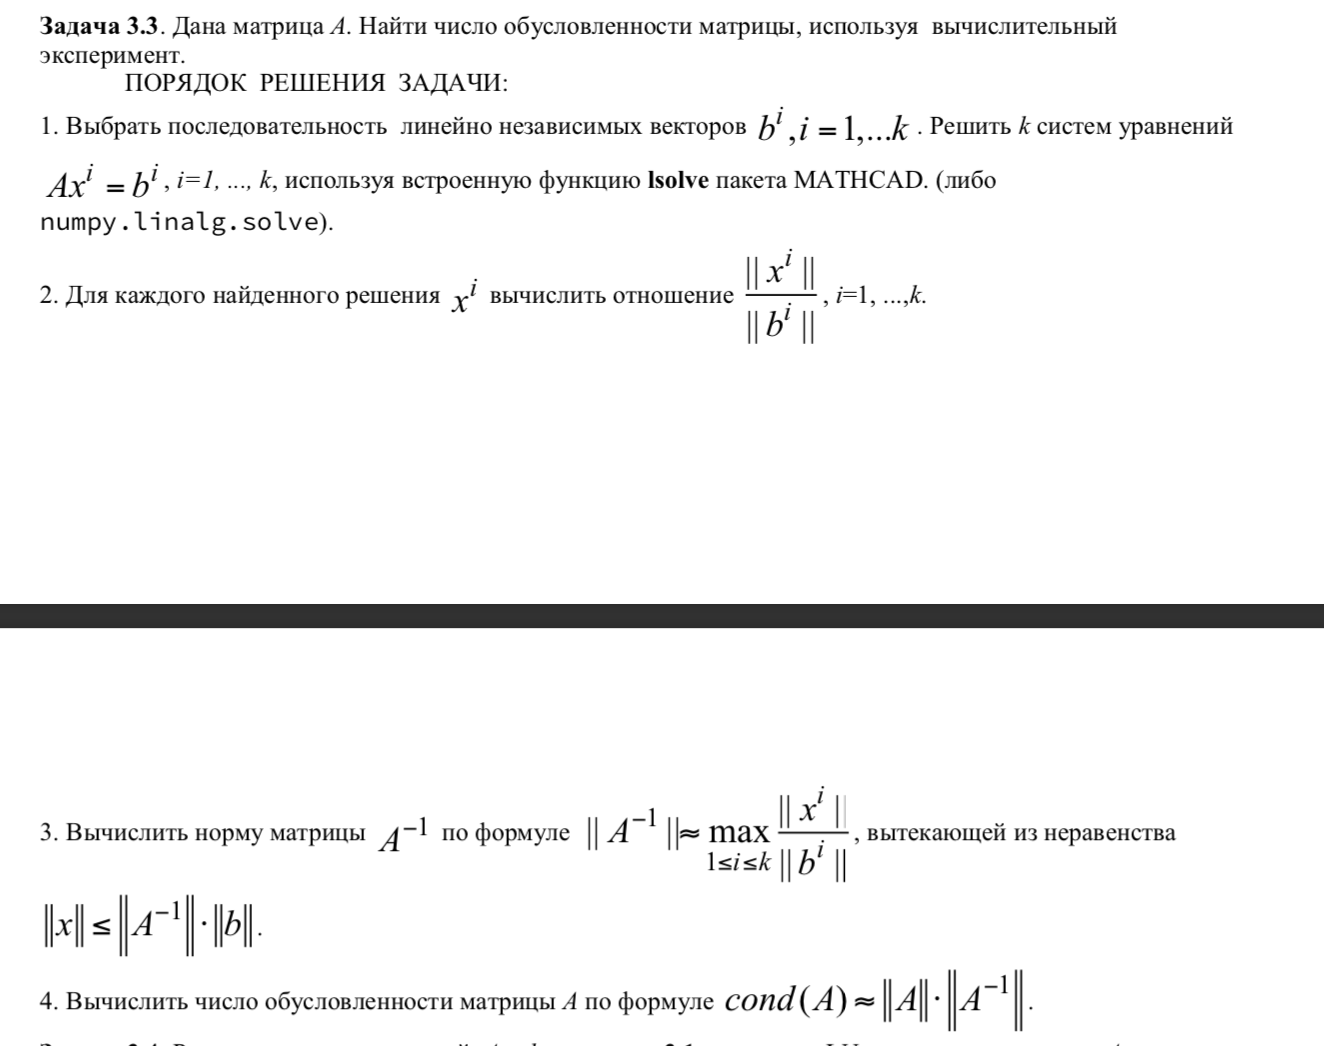

In [469]:
Image("task2.png")

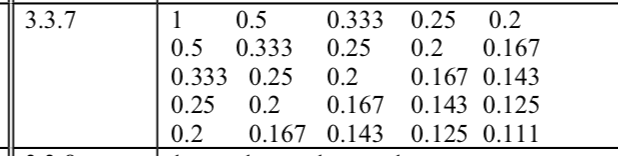

In [470]:
Image("task2var.png")

In [471]:
def matrixBuilt(l):
    '''Функция возвращает матрицу, где на каждой диагонали стоит число, указанное
    на соответвующем месте в входном списке'''
    A = np.zeros((n, n))
    for i in  range (-(n - 1), n):
        A += l[i + 4] * np.eye(n, n, k = i)
    return np.fliplr(A)

In [472]:
# задаем матрицу 
n = 5
N = 25
A = matrixBuilt([0.111, 0.125, 0.143, 0.167, 0.2, 0.25, 0.333, 0.5, 1])
print 'Матрица A:\n', A

Матрица A:
[[1.    0.5   0.333 0.25  0.2  ]
 [0.5   0.333 0.25  0.2   0.167]
 [0.333 0.25  0.2   0.167 0.143]
 [0.25  0.2   0.167 0.143 0.125]
 [0.2   0.167 0.143 0.125 0.111]]


In [473]:
# задаем линейно независимые вектора b, решаем с каждым из них систему уравнений
k = 5
b = np.eye(k)
x = []
for i in range(k):
    x.append(npl.solve(A, b[i]))
print 'Линейно независимые вектора b:\n', b
print 'Решения систем уравнений Ax_i = b_i'
for x_i in x:
    print x_i

Линейно независимые вектора b:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Решения систем уравнений Ax_i = b_i
[  8.14782606 -26.24810656 -24.06834284 114.13492936 -72.71373478]
[  -26.24810656    97.11458396   336.34294191 -1125.61918647
   735.46705772]
[  -24.06834284   336.34294191 -1483.48978182  2429.85395299
 -1287.82259508]
[  114.13492936 -1125.61918647  2429.85395299 -1290.27802645
  -189.48597932]
[  -72.71373478   735.46705772 -1287.82259508  -189.48597932
   905.98312459]


In [474]:
vec = []
for i in range(n):
    vec.append(npl.norm(x[i]) / npl.norm(b[i]))
vec

[140.1738371518507,
 1389.6679912918007,
 3142.789375975355,
 2980.7646485070836,
 1749.6846787427492]

In [475]:
invANorm = npl.norm(vec, np.inf)

In [476]:
condA = npl.norm(A) * invANorm
print 'Число обусловленности матрицы A:', condA

Число обусловленности матрицы A: 4968.332537575446


## Задача 3.10.* Дана система уравнений Ax=b порядка n с разреженной матрицей A. 
Решить систему методом прогонки.
УКАЗАНИЕ. Предусмотреть компактное размещение элементов матрицы в памяти ЭВМ.

На главной диагонали элементы равны 100, на 1 наддиагонали элементы равны 2, на 1 и 2 поддиагоналях элементы равны 7.

n = 30

$b_i = i ⋅ exp(10. / i)$

In [477]:
n = 30
A = 100 * np.eye(n, n) + 2 * np.eye(n, n, k = 1) + 7 * np.eye(n, n, k = -1) + 7 * np.eye(n, n, k = -2)
b = [i * np.exp(10. / i) for i in range(1, n + 1)]
# print 'матрица A: \n', A
print 'вектор b: \n', b

вектор b: 
[22026.465794806718, 296.8263182051532, 84.09487468357841, 48.72997584281389, 36.945280494653254, 31.766940302820178, 29.209137185186673, 27.92274365969473, 27.339585997657345, 27.18281828459045, 27.302715930853132, 27.6117106907139, 28.055371941329796, 28.598178983725987, 29.216010615820135, 29.891935318915557, 30.613731133858764, 31.372361975402242, 32.16100740621027, 32.97442541400257, 33.80852244041966, 34.660056274587, 35.52642638017902, 36.40552311331712, 37.29561744103176, 38.19527904007443, 39.103314623377436, 40.018720907703376, 40.940648329345144, 41.86837275258269]


Мы хотим хранить разреженную матрицу каким то более компактным способом, чтобы не хранить кучу нулей
Поэтому заметим, что на каждой строке в нашей 4-х диагональной матрице есть максимум 4 ненулевых числа
Будем для каждой строки хранить только ненулевые числа на ней (для большинства строк это будут 4 числа,
для 1, 2 и последней - меньше)

В нашем конкретном случае можно было бы ограничится хранением 4х списков (для 1, 2, последней строк и
один список для всех промежуточных строк т к они совпадают)
Но мы не будем так делать так как функция рассчитана на любые матрицы, имеющие подобное устройство (2 поддиагнали, диагональ, 1 наддиагональ)

#### Поэтому будем хранить массив из n списков (максимум по 4 элемента в каждом)

In [478]:
coef = []
coef.append([100., 2.])
coef.append([7., 100., 2.])
for i in range(3, n):
    coef.append([7., 7., 100., 2.])
coef.append([7., 7., 100.])

print '''Вот так выглядит эта забавная структурка в реальной жизни:
(видим, что можно было бы еще сильнее сжать, если бы не хранили много одинаковых списков из 4х элементов)'''
coef

Вот так выглядит эта забавная структурка в реальной жизни:
(видим, что можно было бы еще сильнее сжать, если бы не хранили много одинаковых списков из 4х элементов)


[[100.0, 2.0],
 [7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0, 2.0],
 [7.0, 7.0, 100.0]]

In [479]:
def methodRunSolveSysLinearEq(coef, b):
    '''Функция находит решение системы линейных уравнений методом прогонки для 4х диагональной матрицы с 
    1 наддиагональю и 2 поддиагоналями, на вход получает матрицу A в специальном формате, описанном выше и вектор b.
    Возврашает список решений системы Ax = b
    '''
    # Из первых 2х уравнений находим коэффициенты для дальнейшей прогонки:
    n = len(coef)
    alpha = np.zeros(n)
    betta = np.zeros(n)
    alpha[1] = -coef[0][1] / coef[0][0]
    betta[1] = b[0] / coef[0][0]

    alpha[2] = -coef[1][2] / (coef[1][1] + coef[1][0] * alpha[1])
    betta[2] = (b[1] - coef[1][0] * betta[1]) / (coef[1][1] + coef[1][0] * alpha[1])

    # находим все остальные коэффициенты по формулам:
    for i in range(2, n - 1):
        alpha[i + 1] = -coef[i][3] / (coef[i][0] * alpha[i - 1] * alpha[i] + coef[i][1] * alpha[i] + coef[i][2])
        betta[i + 1] = (b[i] - coef[i][0] * (alpha[i - 1] * betta[i] + betta[i - 1]) - coef[i][1] * betta[i]) / \
                (coef[i][0] * alpha[i - 1] * alpha[i] + coef[i][1] * alpha[i] + coef[i][2])

    x = np.zeros(n)
    # из последнего уравнения находим x_n
    x[n - 1] = (b[n - 1] - coef[n - 1][1] * betta[n - 1] - coef[n - 1][0] * (betta[n - 1] * alpha[n - 2] + betta[n - 2])) / \
            (coef[n - 1][0] * alpha[n - 1] * alpha[n - 2] + coef[n - 1][1] * alpha[n - 1] + coef[n - 1][2])

    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + betta[i + 1]
    return x

### Протестируем функцию на рандомных матрицах, чтобы убедиться, что она не подогнана под наш пример

In [480]:
def getRandMatrix(n):
    coef = []
    A = np.zeros((n, n))
    coef.append(np.random.rand(2))
    A[0][0] = coef[0][0]
    A[0][1] = coef[0][1]
    coef.append(np.random.rand(3))
    A[1][0] = coef[1][0]
    A[1][1] = coef[1][1]
    A[1][2] = coef[1][2]
    for i in range(3, n):
        coef.append(np.random.rand(4))
        for j in range(4):
            A[i - 1][j + i - 3] = coef[i - 1][j]
    coef.append(np.random.rand(3))
    A[n - 1][n - 3] = coef[n - 1][0]
    A[n - 1][n - 2] = coef[n - 1][1]
    A[n - 1][n - 1] = coef[n - 1][2]
    return coef, A

nTest = 10
bTest = np.random.rand(nTest)
coefTest, ATest = getRandMatrix(nTest)
sol1 = methodRunSolveSysLinearEq(coefTest, bTest)
sol2 = npl.solve(ATest, bTest)
print 'Решение нашей функции: \n', sol1
print 'Решение встроенной функции: \n', sol2
print 'Разность модулей: \n', abs(sol1 - sol2)

Решение нашей функции: 
[ 0.89104364 -0.08179965  1.24230142 -0.44929498 -0.52951099  3.44463612
 -1.06998804  1.08109675 -2.86199043  3.46567327]
Решение встроенной функции: 
[ 0.89104364 -0.08179965  1.24230142 -0.44929498 -0.52951099  3.44463612
 -1.06998804  1.08109675 -2.86199043  3.46567327]
Разность модулей: 
[1.11022302e-16 5.55111512e-17 0.00000000e+00 3.33066907e-16
 2.22044605e-16 1.33226763e-15 4.44089210e-16 4.44089210e-16
 8.88178420e-16 4.44089210e-16]


Проверим сразу на нескольких тестах

In [481]:
for i in range(50):
    nTest = int(np.random.rand() * 100) % 100 + 4
    bTest = np.random.rand(nTest)
    coefTest, ATest = getRandMatrix(nTest)
    sol1 = methodRunSolveSysLinearEq(coefTest, bTest)
    sol2 = npl.solve(ATest, bTest)
    if max(abs(sol1 - sol2)) > 1e-5:
        print 'Точность решения неудовл на тесте ', i + 1, ' с матрицей размера ', nTest
        print 'Решение нашей функции: \n', sol1
        print 'Решение встроенной функции: \n', sol2
        print 'Разность модулей: \n', abs(sol1 - sol2)
    else:
        print 'Тест номер ', i + 1, ' завершен успешно с матрицей размера ', nTest

Тест номер  1  завершен успешно с матрицей размера  75
Тест номер  2  завершен успешно с матрицей размера  57
Тест номер  3  завершен успешно с матрицей размера  86
Тест номер  4  завершен успешно с матрицей размера  78
Тест номер  5  завершен успешно с матрицей размера  7
Тест номер  6  завершен успешно с матрицей размера  45
Тест номер  7  завершен успешно с матрицей размера  67
Тест номер  8  завершен успешно с матрицей размера  44
Тест номер  9  завершен успешно с матрицей размера  98
Тест номер  10  завершен успешно с матрицей размера  43
Тест номер  11  завершен успешно с матрицей размера  8
Тест номер  12  завершен успешно с матрицей размера  47
Тест номер  13  завершен успешно с матрицей размера  98
Тест номер  14  завершен успешно с матрицей размера  83
Тест номер  15  завершен успешно с матрицей размера  19
Тест номер  16  завершен успешно с матрицей размера  37
Тест номер  17  завершен успешно с матрицей размера  27
Тест номер  18  завершен успешно с матрицей размера  76
Тес

### Теперь вернемся к нашему варианту и решим систему

In [482]:
print 'Решение нашей системы: \n', methodRunSolveSysLinearEq(coef, b)

Решение нашей системы: 
[ 2.20508490e+02 -1.21915935e+01 -1.37868805e+01  2.28232622e+00
  1.17333607e+00  7.17765640e-02  1.99823928e-01  2.55477970e-01
  2.36871609e-01  2.32655910e-01  2.35390130e-01  2.38505168e-01
  2.42435814e-01  2.47261745e-01  2.52708814e-01  2.58623136e-01
  2.64913895e-01  2.71508979e-01  2.78352443e-01  2.85401501e-01
  2.92622663e-01  2.99989274e-01  3.07479887e-01  3.15077061e-01
  3.22766464e-01  3.30536217e-01  3.38376327e-01  3.46281586e-01
  3.54087271e-01  3.69657908e-01]


In [483]:
# видим, что решение совпадает с решением встроенной функции
npl.solve(A, b)

array([ 2.20508490e+02, -1.21915935e+01, -1.37868805e+01,  2.28232622e+00,
        1.17333607e+00,  7.17765640e-02,  1.99823928e-01,  2.55477970e-01,
        2.36871609e-01,  2.32655910e-01,  2.35390130e-01,  2.38505168e-01,
        2.42435814e-01,  2.47261745e-01,  2.52708814e-01,  2.58623136e-01,
        2.64913895e-01,  2.71508979e-01,  2.78352443e-01,  2.85401501e-01,
        2.92622663e-01,  2.99989274e-01,  3.07479887e-01,  3.15077061e-01,
        3.22766464e-01,  3.30536217e-01,  3.38376327e-01,  3.46281586e-01,
        3.54087271e-01,  3.69657908e-01])